# Python Assignment 3

⏱⏱⏱**Due: 11/02/2023 11:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace. **Please include all outputs in your notebook, including plots, printouts, etc..**

Collaboration is permitted and encouraged; however, it's essential to independently produce and submit your own work. If you collaborate with others, please ensure that you provide their names in the designated section.

Collaborators:_____

##**For Questions 2a and 2b, you can choose one of them to complete, if you completed both, only Questions 2a will be graded.**

**This assignment is out of 150 points; surplus points can be applied to other assignments (including Matlab and C/C++). However, it cannot be applied to your final project grade, and your assignment grade will not excced 75% of your total grade.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, **include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.** Do not submit a compressed file (.rar, .zip, etc..), submit files separately.

If you are tasked with implementing a numerical algorithm, it is expected that you would not rely on pre-existing methods. For example, if you were asked to solve $Ax=b$, you should write your own program to solve, not just by calling numpy.linalg.solve.



## 2a. Numerical Integration (30 pts)

For a domain discretized into $N$ equally spaced panels:
$$
\Delta x=\frac{b-a}{N}.
$$
The approximation to the integral is
$$\begin{aligned}
\int_a^b f(x) d x & \approx \frac{\Delta x}{2} \sum_{k=1}^N\left(f\left(x_{k-1}\right)+f\left(x_k\right)\right) \\
& =\frac{\Delta x}{2}\left(f\left(x_0\right)+2 f\left(x_1\right)+2 f\left(x_2\right)+2 f\left(x_3\right)+\cdots+2 f\left(x_{N-1}\right)+f\left(x_N\right)\right) \\
& =\Delta x\left(\sum_{k=1}^{N-1} f\left(x_k\right)+\frac{f\left(x_N\right)+f\left(x_0\right)}{2}\right) .
\end{aligned}$$
This is the trapezoid rule scheme.


Given the function $f(x) = 3x^2 + 2x +2$, your tasks are:

1. Carry out the integration symbolically using the SymPy library. Output the result (i.e. print out the result).
2. Implement the trapezoid rule to estimate the integral $\int_{-4}^6 f(x) dx$ using the following values of $N = 10, 20, 40, 80, 160, 320, 640, 1280$. Output the results (i.e. print out the results).
3. Plot the absolute error (absolute difference between the numerical approximation and the SymPy result) against N.





In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

# Declare x as a symbol, and set f(x)
x = Symbol('x')
f = 3*x**2 + 2*x +2

# Indefinite and Definite integral
intf = integrate(f,x)
dintf = integrate(f,(x,-4,6))

#Display the results
print("Integral of f:")
display(intf)
print('evaluated at bounds:', dintf)

Integral of f:


x**3 + x**2 + 2*x

evaluated at bounds: 320


In [3]:
steps =  [10,20,40,80,160,320,640,1280] # Holds values of N
R = []
l=0
# Splits the domain into N points, evaluates f at each x value, and finds the area of each trapezoid
while l <= len(steps)-1:
    N = steps[l] #Grab value of N
    heights = []
    deltx = 10/N #(b - a)/N
    xpoints = np.linspace(-4,6,N+1) # Equally spaced points from -4, to 6, based on N
    for i in xpoints: # Evaluates f at each point, and stores in "heights"
        y = f.subs(x,i)
        heights.append(y)

    k=0
    A = []
    while k <= N-1: # adds the values of f(x) for neighboring x values, and stores into A
        adds = heights[k]+heights[k+1]
        A.append(adds)
        k = k+1


    result = sum(A)*deltx/2 # Evaluates the approximate integral, stores into "R"
    R.append(result)
    l = l+1 # iterates for each N value
print(R)


[325.000000000000, 321.250000000000, 320.312500000000, 320.078125000000, 320.019531250000, 320.004882812500, 320.001220703125, 320.000305175781]


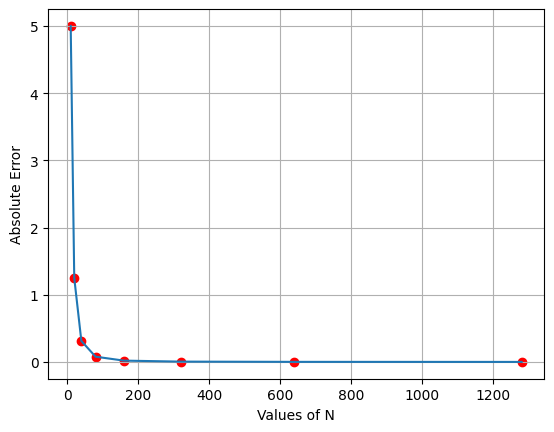

In [4]:
AbsErr = []
j=0
while j <len(R): # Computes the absolute error, stores into "AbsErr"
    g = abs(R[j] - dintf)
    AbsErr.append(g)
    j = j+1

# Plots the absolute errors against corresponding N
plt.plot(steps,AbsErr)
plt.xlabel('Values of N')
plt.ylabel('Absolute Error')
plt.scatter(steps,AbsErr, color='red')
plt.grid()

## 2b. Numerical Differentiation (30 pts)

Your tasks:
1. Find the closed form expression of $f_{xy}(x,y)$, i.e. $\frac{d^2}{dxdy}f(x,y)$, for $f(x,y) = \left(sin^2\left(x\right)e^xcos(y)\right)$ using `sympy`. Output the result.
2. Find $f_{xy}(2,3)$ with `sympy` and take 15 significant digits, use it as the "groud truth solution". Output the result.
3. Approximate $f_{xy}(2,3)$ using central difference approximation for the following values of $h = 0.1, 0.01, 0.001, 0.0001$. Output the results.
4. Plot the absolute error (absolute difference between the numerical approximation and the SymPy result) against the step size $h$. `plt.gca().invert_xaxis() ` might help.

Recall from the lecture:
$$f_{x y}(x, y) \approx \frac{f(x+h, y+k)-f(x+h, y-k)-f(x-h, y+k)+f(x-h, y-k)}{4 h k}.$$
For simplicity, we set $k = h$.

## 3. Pandas I (15 pts)

1. Create a 3x4 (3 rows by 4 columns) pandas DataFrame with the columns named after the following Long Island towns: Hempstead, Babylon, Islip, and Brookhaven. The rows represent 'Population in 2099', 'Population in 2300', 'Population in 2400'. Fill each of the 12 cells in the DataFrame with a random integer from 1000 to 10000, inclusive. `np.random.randint()` might be helpful.
For Example:

```
                    Hempstead  Babylon  Islip  Brookhaven
Population in 2099       2931     8043   8414        8661
Population in 2300       5444     9227   7393        8007
Population in 2400       1660     7977   4730        2940
```



2. Output the following:
  - The entire DataFrame.
  - The value in the cell of row #1 (indexing starts with 0) under the Hempstead column.

3. Add a new column named Riverhead. Populate this column with the sum of the respective row values from the Islip and Brookhaven columns. Output the entire DataFrame again.

In [5]:
import pandas as pd 
import numpy as np


population = []
i=1
while i <=12: # Creates random populations from 1000 to 10000
    x = np.random.randint(1000,10000)
    population.append(x)
    i = i+1

# Assigns each town three populations for each year we are looking at
hempstead_pop = population[0:3]
babylon_pop = population[3:6]
islip_pop = population[6:9]
brookhaven_pop = population[9:12]

# Creates Data Frame with each town, and their populations for each desired year
mydf = pd.DataFrame({'Hempstead':hempstead_pop,
                     'Babylon':babylon_pop,
                     'Islip':islip_pop,
                     'Brookhaven': brookhaven_pop},
                      index = ['Population in 2099', 'Population in 2300', 'Population in 2400'])


display(mydf)
print(mydf.iloc[0,0])

,Hempstead,Babylon,Islip,Brookhaven
Population in 2099,5785,8210,8164,7490
Population in 2300,4801,4093,3009,7251
Population in 2400,2828,8592,2852,5936


5785


In [6]:
# Takes the original Data Frame, and adjoins a column for Riverhead, with population islip + brookhaven
mydf['Riverhead'] = mydf['Islip'] + mydf['Brookhaven']
display(mydf)

,Hempstead,Babylon,Islip,Brookhaven,Riverhead
Population in 2099,5785,8210,8164,7490,15654
Population in 2300,4801,4093,3009,7251,10260
Population in 2400,2828,8592,2852,5936,8788


## 4. Pandas II (15 pts)

0. Download the cvs file that comes with this assignment, and read it into a dataframe. You can also download this [csv file](https://media.githubusercontent.com/media/datablist/sample-csv-files/main/files/customers/customers-100.csv) with this link.
1. Arrange the data in alphabetical order based on the last name. Display the first few rows.
2. Count the number of customers whose subscription date is in 2021 (2021-01-01 to 2021-12-31). Report this number (e.g. print).

In [7]:
# Get the data from the csv file
df = pd.read_csv('https://media.githubusercontent.com/media/datablist/sample-csv-files/main/files/customers/customers-100.csv')
display(df.sort_values('Last Name').head()) # Displays a small amount the whole data frame


# Search for customers with desired subscription dates
dates = df[(df['Subscription Date'] > '2021-01-01') & (df['Subscription Date']< '2021-12-31')]

print('# of customers in desired date range:', dates.shape[0])

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
67,68,a014Ec1b9FccC1E,Tom,Alvarado,Donaldson-Dougherty,South Sophiaberg,Kiribati,(585)606-2980x2258,730-797-3594x5614,nicholsonnina@montgomery.info,2020-08-18,http://odom-massey.com/
96,97,CeD220bdAaCfaDf,Lynn,Atkinson,"Ware, Burns and Oneal",New Bradview,Sri Lanka,+1-846-706-2218,605.413.3198,vkemp@ferrell.com,2021-07-10,https://novak-allison.com/
92,93,aAb6AFc7AfD0fF3,Collin,Ayers,Lamb-Peterson,South Lonnie,Anguilla,404-645-5351x012,001-257-582-8850x8516,dudleyemily@gonzales.biz,2021-06-29,http://www.ruiz.com/
0,1,DD37Cf93aecA6Dc,Sheryl,Baxter,Rasmussen Group,East Leonard,Chile,229.077.5154,397.884.0519x718,zunigavanessa@smith.info,2020-08-24,http://www.stephenson.com/
15,16,8cad0b4CBceaeec,Miranda,Beasley,Singleton and Sons,Desireeshire,Oman,540.085.3135x185,+1-600-462-6432x21881,vduncan@parks-hardy.com,2022-04-12,http://acosta.org/


# of customers in desired date range: 43


## 5. LU decomposition (50 + 30 pts)


Part A (50 points)
1. Write a function `LUdecomposition()` that takes as input a matrix $A\in \mathbb{R}^{n \times n}$. Perform Gaussian Elimination to have this function return two matrices $L$ and $U$ such that $A=LU$.
2. Your function should raise any relevant errors, for example, raise an error if a pure LU decomposition does not exist for $A$ (meaning that you have to perform pivoting, i.e., permutation of rows).
3. Create several random matrices for the purpose of testing your function. Obtain the $L$ and $U$ matrices, and for each random matrix obtain its L and U matrices and perform a matrix multiplication (`np.matmul()`) to determine whether the outcome closely resembles the original matrix $A$, allowing for slight differences attributable to precision errors.


Note: LU decomposition with Gaussian elimination should be covered in your undergraduate linear algebra class. It is also covered in AMS 510. If you do not know how, this 10 minute [video](https://www.youtube.com/watch?v=UlWcofkUDDU&ab_channel=Mathispower4u) explains it very well.

Part B (30 bonus points)
4. Not all square matrices have a pure LU decomposition. However, PLU decomposition always exists. Write another function `pivoting()` that takes as input a matrix $A$ and return the permutation/pivoting matrix $P$ such that $PA$ always has a pure LU decomposition.
5. Find an example $A$ for which `LUdecomposition()` raises an error. Then, use `pivoting()` to find $P$, and find the pure LU decomposition of $PA$. Verify that indeed $PA = LU$ with matrix multiplication (`np.matmul()`).


Hint: Please do not print out a giant matrix and visually examine the outcomes. Think of a way to verify your results and output a boolean value.


Fact: LU and PLU decompositions are not unique.

In [8]:

A = np.random.rand(3, 3)
B = np.random.rand(5, 5)
C = np.random.rand(10, 10)

def LUdecomposition(A):
  L = np.eye(len(A)) # Creates identity matrix of dimensions from A, L
  U = A.copy() # Makes a copy of A, U

  # A has no LU decomposition if:
  # Any of it's sub-square-matrices including the top left corner have det=0
  # It's top left entry is 0

  if U[0,0] == 0:
    return print('LU decomposition does not exist')
  for n in range(0,len(A)):
    if np.linalg.det(U[0:n,0:n]) == 0:
      return print('LU decomposition does not exist')

  # Do Gaussian elimination to make an upper triangular, U, and store the factors to get a lower triangular, L
  j=0
  while j < len(A):
    for i in range(j+1,len(A)):
      factor = U[i,j]/U[j,j]
      L[i,j]= factor
      for k in range(0,len(A)):
        U[i,k] = U[i,k] - (factor * U[j,k]) 
    j = j+1

  # Compute the differences from original matrix, to the matrix LU

  LU = np.matmul(L,U)
  n = (len(LU), len(LU))
  differences = np.zeros(n)
  j = 0
  while j < len(LU):
    for i in range(0,len(LU)):
      differences[i,j] = abs(LU[i,j]-A[i,j])
    j = j+1


  # Check if the differences are "close enough," less than 1e-5
  return{  print('Are all values of matrix entry, compared to LU, within 1e-5?:'),
           print(np.all(differences <= 1e-5))
        }


LUdecomposition(A)
LUdecomposition(B)
LUdecomposition(C)




# For the bonus, a matrix that doesn't have an LU decompositon is, for example, any matrix with 0 in the upper left corner.

Are all values of matrix entry, compared to LU, within 1e-5?:
True
Are all values of matrix entry, compared to LU, within 1e-5?:
True
Are all values of matrix entry, compared to LU, within 1e-5?:
True


{None}

## 6. Markov Chain (30 pts)

**BACKGROUND:** Consider a Markov chain transition matrix $P$ on a set of $n$ states, where $P_{i j}$ corresponds to the probability $\left(0 \leq P_{i j} \leq 1\right)$ to go from state $i$ to the state $j$, and each row is normalized so that
$$
\sum_{j=1}^n P_{i j}=1 .
$$

Let $p$ be a size- $n$ vector composed of the probability distribution over the $n$ states, where
$$
\sum_{j=1}^n p_j=1 .
$$

The transition rule corresponding to the transition matrix $P$ is $\hat{p}=P^T p$, where $\hat{p}$ corresponds to a new probability distribution and
$$
\sum_{j=1}^n \hat{p}_j=1 .
$$
TASK: Write a program that works with 5 states `only use the numpy library`. In particular,
0. Fix the random seed to be the last digit of your id: `numpy.random.seed()`.

1. Construct a random $5 \times 5$ matrix $P$, and normalize each row so that
$$
\sum_{j=1}^5 P_{i j}=1 .
$$

2. Construct a random size-5 vector $p$ and normalize it so that
$$
\sum_{j=1}^5 p_j=1 .
$$
Apply the transition rule 50 times to obtain $p_{50}$.
3. Compute the eigenvector $v$ of $P^T$ corresponding to the eigenvalue 1 (and numerically, the eigenvalue closest to $1)$, and then scale the eigenvector so that
$$
\sum_{j=1}^5 v_j=1 .
$$
This scaled eigenvector is known as the stationary distribution.

4. Compute the component wise difference between $p_{50}$ and the stationary distribution. Do they match with each other within $1 \mathrm{e}-5$ ?

HINTS: You may find the following functions useful in your implementation:
- np.random.rand
- np.dot
- np.linalg.eig

In [11]:
import numpy as np
np.random.seed(4)

# Construct random 5x5 matrix P, and normalize row-wise so sum is 1
P = np.random.rand(5,5)
Norms = np.abs(P).sum(axis=1)

for k in range(0,len(P)):
    P[k] = P[k]/Norms[k]

# Construct 1x5 vector p, and normalize so sum is 1
p = np.random.rand(1,5)
Normp = np.abs(p).sum(axis=1)
p = p/Normp[0]

# Write p as a column vector, transpose P as per the equation above
pcol = np.transpose(p)
Pt= np.transpose(P)

# Iterate to get p50
for x in range(0,50):
    pcol= np.dot(Pt,pcol)

# Find Eigenvalues/vectors using numpy
eigenvalues, eigenvectors = np.linalg.eig(P)

# Extract eigenvector corresponding to eigenvalue = 1. Then, normalize
v = eigenvectors[0:5,0]
Normv = np.abs(v).sum(axis=0)
v = v/Normv

# Computes the component wise difference, stores it into "diffs"
diffs = np.zeros(5)
for x in range(0,5):
    diffs[x] = abs(pcol[x]- v[x])

# Checks if each of these differences is less than 1e-5
print('All differences are within 1e-5? ')
np.all(diffs <= 1e-5)


All differences are within 1e-5? 


/var/folders/5r/mry45nq14jl1lk1my6jwpt340000gn/T/ipykernel_48969/2660851440.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  diffs[x] = abs(pcol[x]- v[x])


False